### EDA

### titanic data로 EDA를 해보자!

#### 1. 분석의 목적과 변수 확인

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic/train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

1. survived: 생존 여부
2. Pclass: 좌석 등급
3. ....

결론적으로는 이들의 변수를 가지고 생존여부를 예측하는 분류 데이터셋

#### 2. 데이터 전체적으로 살펴보기

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# 상관계수 파악
df.corr()

/var/folders/_r/kxkkxvgj5yv38f_spv647jxc0000gn/T/ipykernel_1737/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [13]:
# 결측치 확인
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 3. 데이터의 개별 속성 파악하기

<Axes: xlabel='Survived', ylabel='count'>

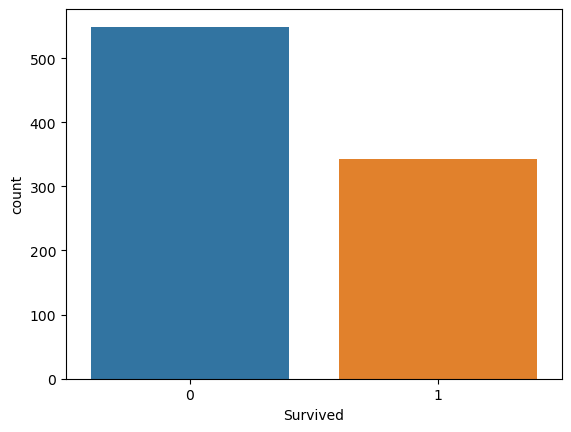

In [16]:
### 생존자, 사망자 명수는?
import seaborn as sns
survive = df['Survived'].value_counts()

sns.countplot(x='Survived', data=df)

In [20]:
## Pclass에 따른 인원 파악
df[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [22]:
df[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


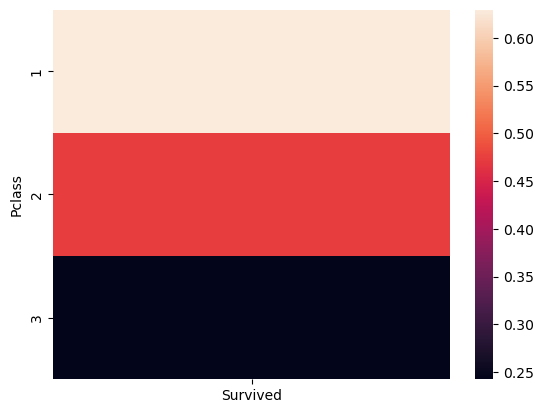

In [25]:
import matplotlib.pyplot as plt
sns.heatmap(df[['Pclass', 'Survived']].groupby('Pclass').mean())
plt.show()

In [30]:
## 성별과 생존율의 관계
df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

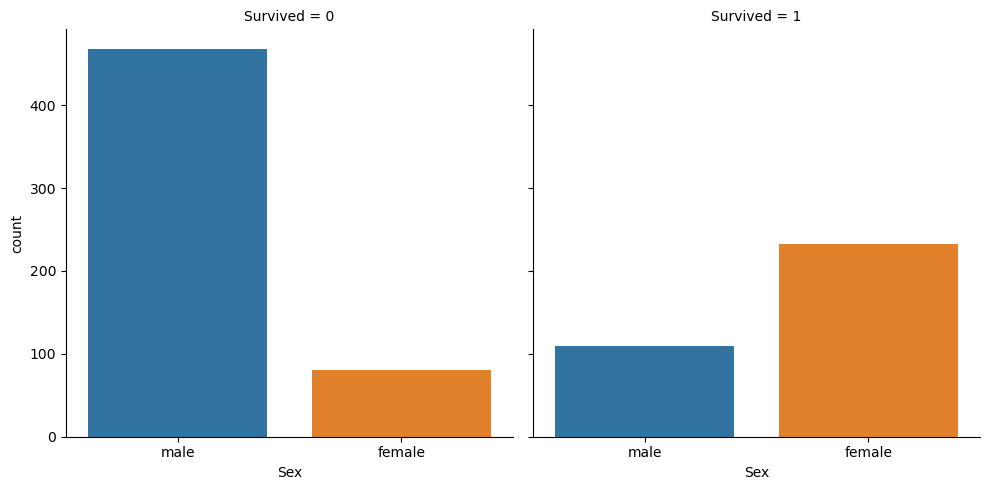

In [33]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df)

In [35]:
## 나이
df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

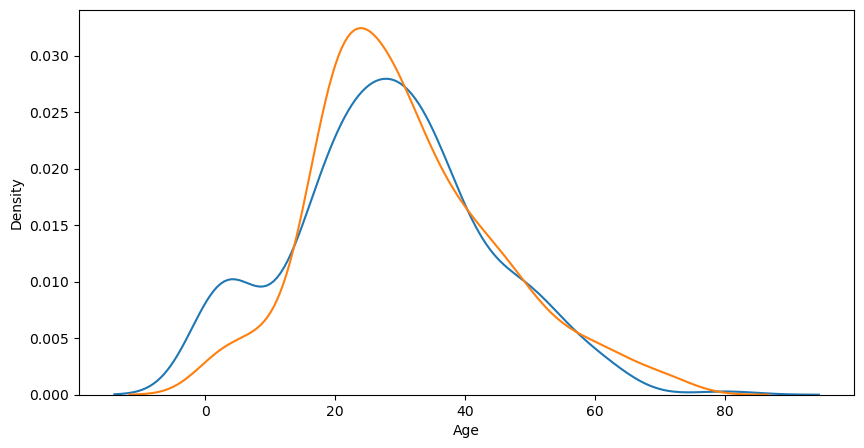

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=df[df['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(x=df[df['Survived'] == 0]['Age'], ax=ax)

#### Appendix 1. Sex + Pclass vs Survived

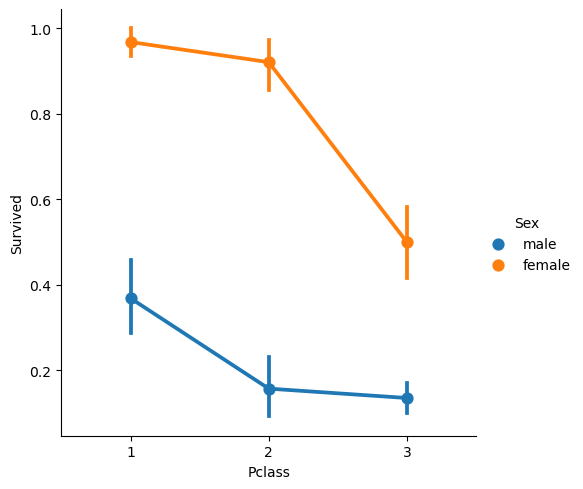

In [43]:
sns.catplot(x='Pclass', y='Survived',hue='Sex', kind='point', data=df)
plt.show()

#### Appendix 2. Age + Pclass 

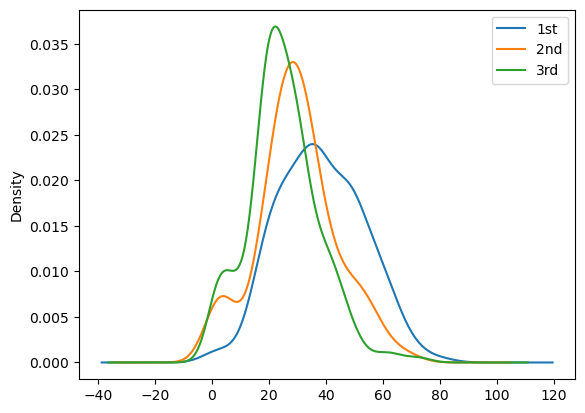

In [49]:
df['Age'][df.Pclass==1].plot(kind='kde')
df['Age'][df.Pclass==2].plot(kind='kde')
df['Age'][df.Pclass==3].plot(kind='kde')
plt.legend(['1st', '2nd', '3rd'])
plt.show()

1. 유의미한 Feature 찾아보기
2. Kaggle Dataset으로 유의미한 Feature 3개 찾고 시각화하기